# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress
from scipy import stats



# Import API key
from api_keys import weather_api_key


# Defininig Farenheit as units used in this project
units = "Imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

base_url= "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}"
#query_url

print(len(cities))
cities

614


['kigoma',
 'carnarvon',
 'touros',
 'ugoofaaru',
 'khatanga',
 'punta arenas',
 'la ronge',
 'thompson',
 'rikitea',
 'igarka',
 'chuy',
 'mataura',
 'brainerd',
 'loon op zand',
 'marsh harbour',
 'ribeira grande',
 'vaini',
 'jamestown',
 'bluff',
 'sentyabrskiy',
 'severo-kurilsk',
 'salina',
 'taolanaro',
 'saint-pierre',
 'atuona',
 'cherskiy',
 'omboue',
 'bucarasica',
 'tandil',
 'peterhead',
 'kahului',
 'port elizabeth',
 'yellowknife',
 'saint-francois',
 'launceston',
 'ushuaia',
 'hobart',
 'cape town',
 'chokurdakh',
 'sao filipe',
 'grindavik',
 'ouegoa',
 'ukiah',
 'provideniya',
 'kapaa',
 'monrovia',
 'amderma',
 'esperance',
 'puerto ayora',
 'nikolskoye',
 'nizhneyansk',
 'georgetown',
 'mys shmidta',
 'manggar',
 'vallenar',
 'tsihombe',
 'tiksi',
 'agadez',
 'port alfred',
 'kununurra',
 'codrington',
 'albany',
 'santa rosa',
 'peleduy',
 'ixtapa',
 'camacupa',
 'klaksvik',
 'verkhoyansk',
 'torbay',
 'mokobeng',
 'bien hoa',
 'cabo san lucas',
 'henties bay',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_data = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name_data.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_print=(response["name"])
        print(f"Processing Record | {city_print}")
    except:
        print("No results, skipping.....")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record | Kigoma
Processing Record | Carnarvon
Processing Record | Touros
Processing Record | Ugoofaaru
Processing Record | Khatanga
Processing Record | Punta Arenas
Processing Record | La Ronge
Processing Record | Thompson
Processing Record | Rikitea
Processing Record | Igarka
Processing Record | Chui
Processing Record | Mataura
Processing Record | Brainerd
Processing Record | Gemeente Loon op Zand
Processing Record | Marsh Harbour
Processing Record | Ribeira Grande
Processing Record | Vaini
Processing Record | Jamestown
Processing Record | Bluff
No results, skipping.....
Processing Record | Severo-Kuril'sk
Processing Record | Salina
No results, skipping.....
Processing Record | Saint-Pierre
Processing Record | Atuona
Processing Record | Cherskiy
Processing Record | Omboué
Processing Record | Bucarasica
Processing Record | Tandil
Processing Record | Peterhead
Processing Record | Kahului
Processing Record | Port Elizabeth

Processing Record | Sioux Lookout
Processing Record | Alyangula
Processing Record | Saint-Philippe
Processing Record | Coração de Maria
Processing Record | Morón
Processing Record | Kathu
Processing Record | Lompoc
Processing Record | Panabá
No results, skipping.....
Processing Record | Sanica
Processing Record | Marzuq
Processing Record | Faya
Processing Record | Iralaya
Processing Record | Borovoy
No results, skipping.....
Processing Record | Eyl
Processing Record | Ostrovnoy
Processing Record | Richards Bay
Processing Record | Qaqortoq
No results, skipping.....
Processing Record | Gusino
Processing Record | Bilibino
No results, skipping.....
Processing Record | Lüderitz
Processing Record | Pacific Grove
Processing Record | Duleek
Processing Record | Stornoway
Processing Record | Suntar
Processing Record | Hohhot
Processing Record | Poddor'ye
No results, skipping.....
Processing Record | Tevaitoa
Processing Record | Marawi
Processing Record | Kavieng
Processing Record | Comodoro Riva

Processing Record | Arlit
Processing Record | Salalah
Processing Record | Rørvik
Processing Record | Maţāy
Processing Record | Pemberton
Processing Record | San Cristobal
Processing Record | Djibo
Processing Record | Aykhal
Processing Record | Rocha
Processing Record | Sola
Processing Record | Lubango
Processing Record | Trossingen
Processing Record | Natal
Processing Record | Zaysan
Processing Record | Fort Dix
Processing Record | Sept-Îles
Processing Record | Gilleleje
Processing Record | Juazeiro
Processing Record | Marsá Maţrūḩ
Processing Record | Hirara
No results, skipping.....
Processing Record | Kumul
Processing Record | Zhigansk
Processing Record | Tateyama
Processing Record | Samarai
Processing Record | Cidreira
Processing Record | Åmot
Processing Record | Lang Son
Processing Record | Vostok
Processing Record | Khasan
Processing Record | Onguday
Processing Record | Mahayag
Processing Record | Aksu
Processing Record | Kamina
Processing Record | Sergeevka
Processing Record | Dr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# weatherdata_df = pd.DataFrame({"City":city_name_data, 
#                                "Lat": lat_list,
#                                "Lng": lng_list,
#                                "Max Temp": max_temp,
#                                "Humidity": humidity,
#                                "Cloudiness":cloudiness,
#                                "Wind Speed": wind_speed,
#                                "Country": country,
#                                "Date":date})
# weatherdata_df


weather_dictionary_list = ({"City":city_name_data, 
                               "Lat": lat_list,
                               "Lng": lng_list,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness":cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date":date})

weather_life_df = pd.DataFrame(weather_dictionary_list)


weather_life_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kigoma,-4.88,29.63,73.45,69,33,2.37,TZ,1595462130
1,Carnarvon,-24.87,113.63,53.60,100,0,4.70,AU,1595462012
2,Touros,-5.20,-35.46,77.00,78,75,8.05,BR,1595461864
3,Ugoofaaru,5.67,73.00,81.75,78,98,20.62,MV,1595462131
4,Khatanga,71.97,102.50,47.05,81,100,16.60,RU,1595461998
...,...,...,...,...,...,...,...,...,...
547,Leshukonskoye,64.90,45.76,63.46,80,23,8.68,RU,1595462186
548,Flagstaff,35.20,-111.65,78.01,36,20,4.70,US,1595462049
549,Kashgar,39.45,75.98,68.00,40,0,8.95,CN,1595462186
550,São Félix do Xingu,-6.64,-51.99,76.17,51,9,2.01,BR,1595462186


In [6]:
# Exporting the dataframe above to CSV, located in the output_data directory

weather_life_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


over_100_humidity = weather_life_df.loc[weather_life_df["Humidity"]>90]
over_100_humidity.reset_index(inplace=True)
over_100_humidity



,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Carnarvon,-24.87,113.63,53.60,100,0,4.70,AU,1595462012
1,5,Punta Arenas,-53.15,-70.92,28.40,92,18,10.29,CL,1595462079
2,10,Chui,-33.70,-53.46,64.74,95,100,7.20,UY,1595462131
3,26,Tandil,-37.32,-59.13,51.01,94,100,11.99,AR,1595462046
4,27,Peterhead,57.51,-1.80,55.40,93,90,3.36,GB,1595462133
...,...,...,...,...,...,...,...,...,...,...
87,504,Salalah,17.02,54.09,78.80,94,90,11.41,OM,1595462182
88,510,Aykhal,66.00,111.50,53.60,93,90,8.95,RU,1595462183
89,511,Rocha,-34.48,-54.33,66.38,95,100,8.48,UY,1595462145
90,525,Tateyama,34.98,139.87,78.01,94,75,2.24,JP,1595462184


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = over_100_humidity
clean_city_data

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Carnarvon,-24.87,113.63,53.60,100,0,4.70,AU,1595462012
1,5,Punta Arenas,-53.15,-70.92,28.40,92,18,10.29,CL,1595462079
2,10,Chui,-33.70,-53.46,64.74,95,100,7.20,UY,1595462131
3,26,Tandil,-37.32,-59.13,51.01,94,100,11.99,AR,1595462046
4,27,Peterhead,57.51,-1.80,55.40,93,90,3.36,GB,1595462133
...,...,...,...,...,...,...,...,...,...,...
87,504,Salalah,17.02,54.09,78.80,94,90,11.41,OM,1595462182
88,510,Aykhal,66.00,111.50,53.60,93,90,8.95,RU,1595462183
89,511,Rocha,-34.48,-54.33,66.38,95,100,8.48,UY,1595462145
90,525,Tateyama,34.98,139.87,78.01,94,75,2.24,JP,1595462184


In [ ]:
# Extract relevant fields from the data frame




# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

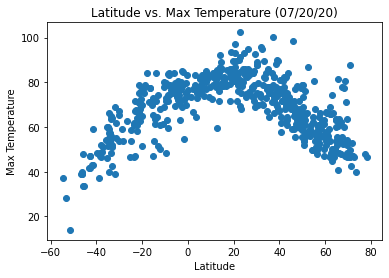

In [13]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature (07/20/20)")


plt.show()

## Latitude vs. Humidity Plot

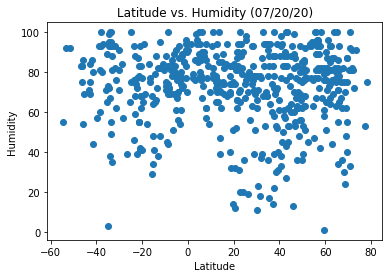

In [14]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (07/20/20)")


plt.show()

## Latitude vs. Cloudiness Plot

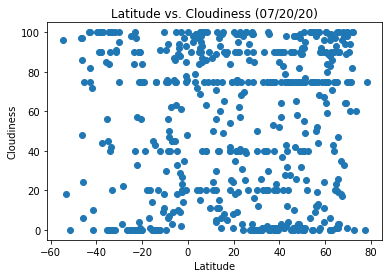

In [15]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (07/20/20)")

plt.show()

## Latitude vs. Wind Speed Plot

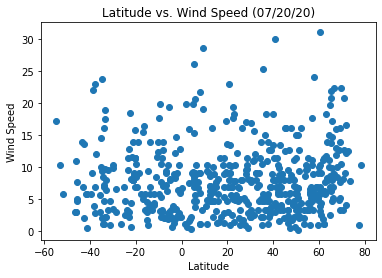

In [16]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (07/20/20)")


plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [44]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemis = weather_life_df.loc[weather_life_df["Lat"]>0]
nothern_hemis.reset_index(inplace=True)

southern_hemis = weather_life_df.loc[weather_life_df["Lat"]<0]
southern_hemis.reset_index(inplace=True)




# Latitudes
lat_graph_northern = nothern_hemis['Lat']
lat_graph_southern = southern_hemis['Lat']



# Max Temps
max_temp_graph_northern = nothern_hemis['Max Temp']
max_temp_graph_southern = southern_hemis['Max Temp']

(mt_slope, mt_int, mt_r, mt_p, mt_std_err) = stats.linregress(
    lat_graph_northern,max_temp_graph_northern)

(smt_slope, smt_int, smt_r, smt_p, smt_std_err) = stats.linregress(
    lat_graph_southern,max_temp_graph_southern)



# Humidities
hum_graph_northern = nothern_hemis['Humidity']
hum_graph_southern = southern_hemis['Humidity']


(nhu_slope, nhu_int, nhu_r, nhu_p, nhu_std_err) = stats.linregress(
    lat_graph_northern,hum_graph_northern)

(shu_slope, shu_int, shu_r, nhu_p, shu_std_err) = stats.linregress(
    lat_graph_southern,hum_graph_southern)


# Cloudiness
cloud_graph_northern = nothern_hemis['Cloudiness']
cloud_graph_southern = southern_hemis['Cloudiness']

(nclo_slope, nclo_int, nclo_r, nclo_p, nclo_std_err) = stats.linregress(
    lat_graph_northern,cloud_graph_northern)

(sclo_slope, sclo_int, sclo_r, sclo_p, sclo_std_err) = stats.linregress(
    lat_graph_southern,cloud_graph_southern)



# Wind Speeds
wind_speed_northern = nothern_hemis['Wind Speed']
wind_speed_southern = southern_hemis['Wind Speed']

(nws_slope, nws_int, nws_r, nws_p, nws_std_err) = stats.linregress(
    lat_graph_northern,wind_speed_northern)

(sws_slope, sws_int, sws_r, sws_p, sws_std_err) = stats.linregress(
    lat_graph_southern,wind_speed_southern)




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5349287616052738


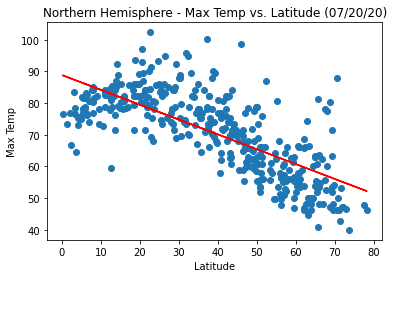

In [45]:
regress_values = lat_graph_northern * mt_slope + mt_int
line_eq = "y = " + str(round(mt_slope,2)) + "x + " + str(round(mt_int,2))

plt.scatter(lat_graph_northern,max_temp_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (07/20/20)")


print(f"R squared: {mt_r**2}")


plt.show()






####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6541021365600529


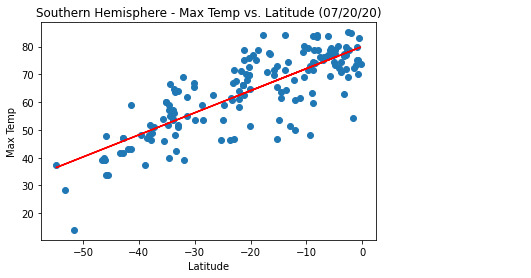

In [46]:
regress_values = lat_graph_southern * smt_slope + smt_int
line_eq = "y = " + str(round(smt_slope,2)) + "x + " + str(round(smt_int,2))

plt.scatter(lat_graph_southern,max_temp_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (07/20/20)")


print(f"R squared: {smt_r**2}")


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.002810756549404982


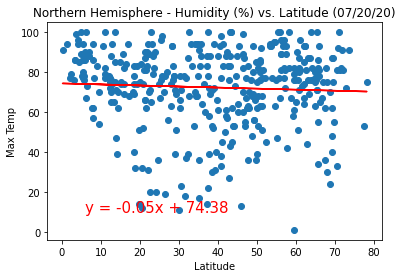

In [47]:
regress_values = lat_graph_northern * nhu_slope + nhu_int
line_eq = "y = " + str(round(nhu_slope,2)) + "x + " + str(round(nhu_int,2))

plt.scatter(lat_graph_northern,hum_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (07/20/20)")


print(f"R squared: {nhu_r**2}")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 9.936237848341663e-05


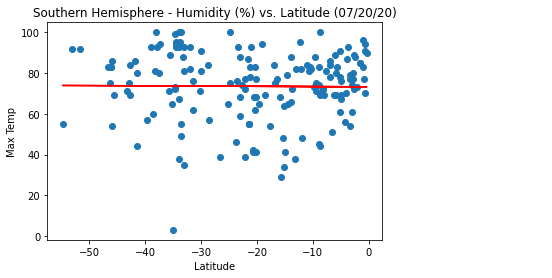

In [48]:

regress_values = lat_graph_southern * shu_slope + shu_int
line_eq = "y = " + str(round(shu_slope,2)) + "x + " + str(round(shu_int,2))

plt.scatter(lat_graph_southern,hum_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (07/20/20)")


print(f"R squared: {shu_r**2}")


plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.00017791203361845244


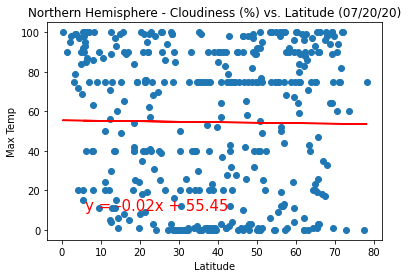

In [49]:
regress_values = lat_graph_northern * nclo_slope + nclo_int
line_eq = "y = " + str(round(nclo_slope,2)) + "x + " + str(round(nclo_int,2))

plt.scatter(lat_graph_northern,cloud_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (07/20/20)")


print(f"R squared: {nclo_r**2}")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0073755346179474445


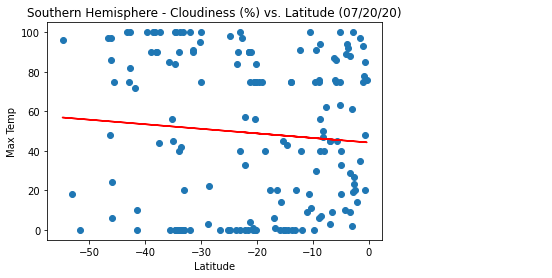

In [51]:
regress_values = lat_graph_southern * sclo_slope + sclo_int
line_eq = "y = " + str(round(sclo_slope,2)) + "x + " + str(round(sclo_int,2))

plt.scatter(lat_graph_southern,cloud_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (07/20/20)")


print(f"R squared: {sclo_r**2}")


plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0038422621873832096


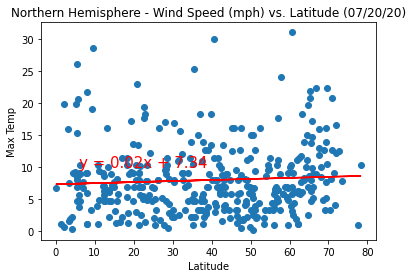

In [52]:
regress_values = lat_graph_northern * nws_slope + nws_int
line_eq = "y = " + str(round(nws_slope,2)) + "x + " + str(round(nws_int,2))

plt.scatter(lat_graph_northern,wind_speed_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (07/20/20)")


print(f"R squared: {nws_r**2}")


plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.011494421851471618


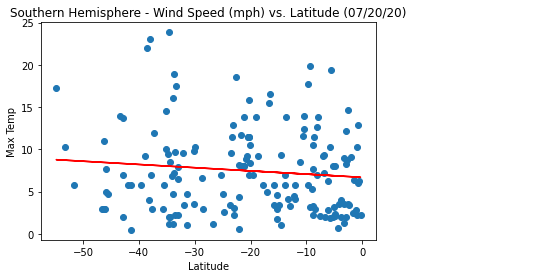

In [54]:
regress_values = lat_graph_southern * sws_slope + sws_int
line_eq = "y = " + str(round(sws_slope,2)) + "x + " + str(round(sws_int,2))

plt.scatter(lat_graph_southern,wind_speed_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (07/20/20)")


print(f"R squared: {sws_r**2}")


plt.show()